<a href="https://colab.research.google.com/github/AnaRisco/PYTHON-EXAMEN-FINAL-ANA-RISCO/blob/main/ExamenFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXAMEN ANA RISCO 

In [1]:
"""
Establezca 2 modelos de clasificación para el data Iirs
"""

import sklearn
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt



In [2]:
iris = load_iris()

print(iris.data.shape)
n_samples, n_features = iris.data.shape
print(n_samples)
print(n_features)
print(iris.data[0])
print(iris.target.shape)
print(iris.target)
print(iris.target_names)

(150, 4)
150
4
[5.1 3.5 1.4 0.2]
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


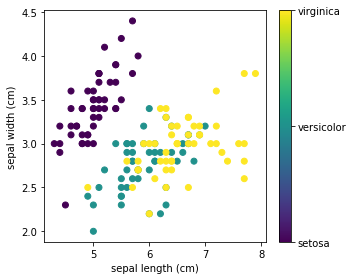

In [3]:

x_index = 0
y_index = 1


formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

['virginica']


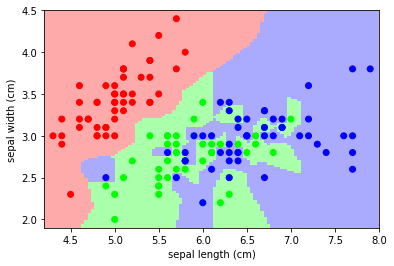

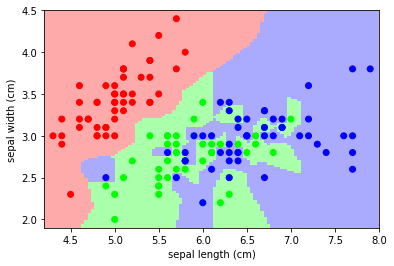

In [4]:
#MODELO 1 KNN
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)


print(iris.target_names[knn.predict([[3, 5, 4, 2]])])
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]

y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')



knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)




Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)



plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

plt.show()

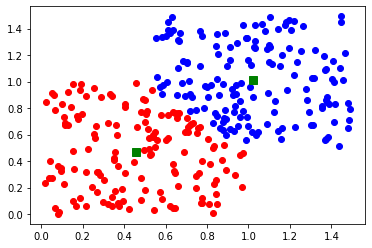

In [5]:
# MODELO 2 K-MEANS

from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

# data generation
data = vstack((rand(150,2) + array([.5,.5]),rand(150,2)))

# computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(data,2)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'or')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [6]:
"""
Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses
"""
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [7]:
data_df=pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv')
data_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


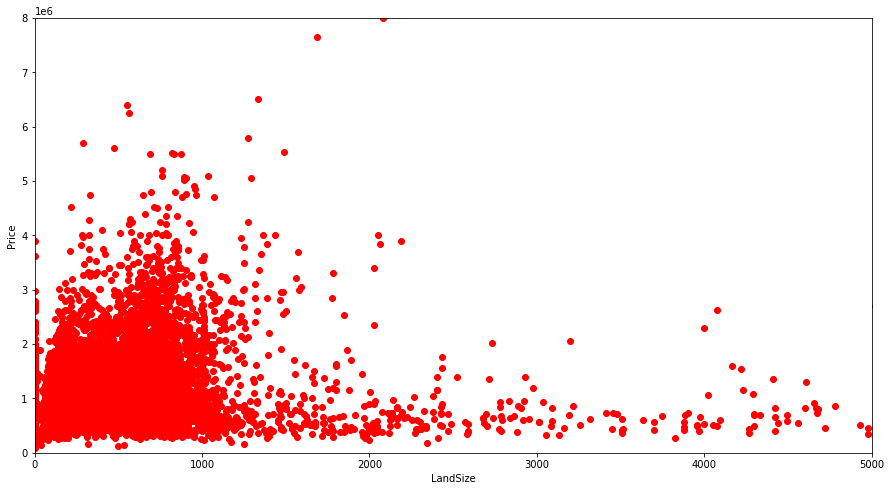

In [8]:
fig, ax = plt.subplots(figsize = (15,8))
ax.scatter(data_df['Landsize'], data_df['Price'],color='red')
ax.set_xlabel('LandSize')
ax.set_ylabel('Price')
plt.xlim([0,5000])
plt.ylim([0,8e6])
plt.show()

In [9]:
X = np.array(data_df.drop(columns = ['Suburb','Address','Type','Method','SellerG','Date','BuildingArea','YearBuilt','Car','CouncilArea','Regionname']))


(13580,)


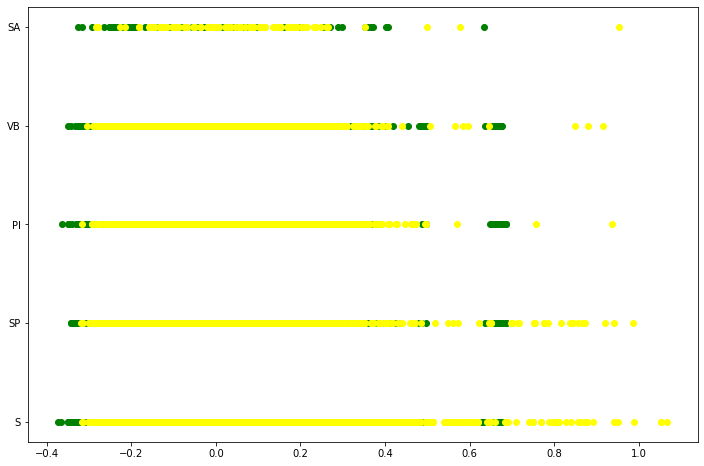

In [10]:
from sklearn.preprocessing import MinMaxScaler

escalador= MinMaxScaler()

X_escalado = escalador.fit_transform(X)


#MODELO PCA

from sklearn.decomposition import PCA
pca1 = PCA(n_components=2) 



pca1.fit(X_escalado)
Xpca=pca1.transform(X_escalado)

y=np.array(data_df['Method'])
print(np.shape(y))



plt.figure(figsize = (12,8))
plt.scatter(Xpca[:,0],y,c='green')
plt.scatter(Xpca[:,1],y,c='yellow')
plt.show()



In [11]:
#MODELO 2 : K-MEANS

X_df=data_df.drop(columns = ['Suburb',	'Address',	'Type', 'Method', 'SellerG', 'Date', 'BuildingArea', 'YearBuilt', 'Car', 'CouncilArea', 'Regionname'])

X_featuresdf = X_df
X_featuresarray=np.array(X_featuresdf)

X_feat_method = data_df['Method']
X_feat_method_array = np.array(X_feat_method)

from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Encoder.fit(X_feat_method_array)
x_method_encoder = Encoder.fit_transform(X_feat_method_array)


In [12]:
X_sinmethod = data_df.drop(columns = ['Suburb',	'Address',	'Type', 'Method', 'SellerG', 'Date', 'BuildingArea', 'YearBuilt', 'Car', 'CouncilArea', 'Regionname'])
X_sinmethod['Método codificado'] = x_method_encoder


[[0.11111111 0.15647785 0.05197505 ... 0.51765125 0.17615999 0.25      ]
 [0.11111111 0.10656197 0.05197505 ... 0.51308312 0.17615999 0.25      ]
 [0.22222222 0.15479529 0.05197505 ... 0.51399675 0.17615999 0.75      ]
 ...
 [0.22222222 0.12170499 0.14137214 ... 0.41622051 0.28648194 0.25      ]
 [0.33333333 0.27089176 0.14137214 ... 0.42134595 0.28648194 0.        ]
 [0.33333333 0.1346046  0.13097713 ... 0.41358013 0.29409841 0.75      ]]
(13580, 2)
(13580,)


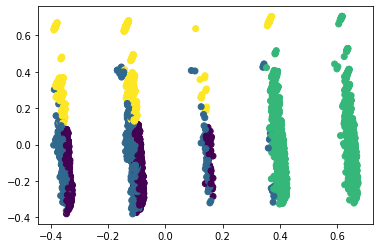

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
scaler = MinMaxScaler()
Xgenerado = np.array(X_sinmethod)
X_scal=scaler.fit_transform(Xgenerado)
print(X_scal)

k_means2 = KMeans(n_clusters = 4)
k_means2.fit(X_scal)
labels = k_means2.labels_

pca3 = PCA(n_components = 2)
pca3.fit(X_scal)
Xpca = pca3.fit_transform(X_scal)

print(np.shape(Xpca))
print(np.shape(labels))
plt.scatter(Xpca[:,0],Xpca[:,1],c = labels)
plt.show()

In [16]:
"""
¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 
"""


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier



df=pd.read_excel('/content/wine.xlsx')
df

%matplotlib inline


df_new=df[['price','points']]

df_new['points']=df_new['points']>85
df_new=df_new.rename(columns={'points':'type'})
count_b=df_new['type'].sum()
print('existen ', count_b, 'winos de calidad buena')



existen  115322 winos de calidad buena


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


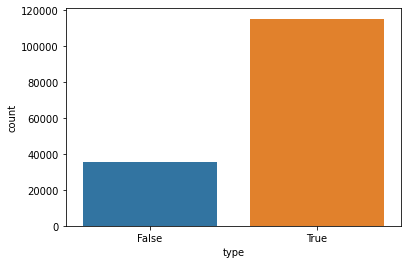

In [17]:
X=np.array(df_new['price'])
X=X.reshape(-1,1)
y=df_new['type']
sns.countplot(y)
plt.show()
#True es vinos bueno y False vinos malos

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
CLASIFICADOR_RF = RandomForestClassifier(n_estimators=200)
CLASIFICADOR_RF.fit(X_train, y_train)
pred_rfc = CLASIFICADOR_RF.predict(X_test)

ValueError: ignored

In [19]:
"""
Puedes graficar un modelo de deep leraning para la dataset de breast-cancer
"""


import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import metrics
import matplotlib.gridspec as gridspec 

%matplotlib inline

#ingreso la data set con pandas
df=pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/breast-cancer.csv')


df.drop('id',axis=1,inplace=True)

features_mean=list(df.columns[1:11])

dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

features_mean


traindf, testdf = train_test_split(df, test_size = 0.4)

#falta escoger el modelo

features_mean






['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [21]:

"""
Crea una función que aplane la ruta de una imágen
"""

import matplotlib.pyplot as plt
import numpy as np



def aplana_imagenes_funcion():
  image=plt.imread(input('Ingresa ruta de la imagen: '))
  image_vector=image.flatten()
  print('Se ha realizado el aplanado de ruta de la image :')
  print(np.shape(image_vector))
aplana_imagenes_funcion()


















KeyboardInterrupt: ignored